In [4]:
import pandas as pd

In [5]:
pd.set_option('display.max_columns', 100)

In [6]:
import altair as alt

## Load Zoe's modified dataset with race percentages 

In [7]:
df2 = pd.read_csv('data/incarceration_trends_w_percs.csv')

In [9]:
alameda_percs = df2[df2.county_name=='Alameda County']

In [11]:
pd.melt(alameda_percs, id_vars=['year'], value_vars=['perc_white_prison_pop', 'perc_black_prison_pop']).head()

,year,variable,value
0,1970,perc_white_prison_pop,NaN
1,1971,perc_white_prison_pop,NaN
2,1972,perc_white_prison_pop,NaN
3,1973,perc_white_prison_pop,NaN
4,1974,perc_white_prison_pop,NaN


In [91]:
# List the values we are interested in 
values = ['perc_white_total_pop',
          'perc_black_total_pop',
           'perc_black_jail_pop',
           'perc_white_jail_pop',
         'perc_white_prison_pop',
         'perc_black_prison_pop']

In [92]:
# Melt out those values into individual rows
alameda_melt = pd.melt(alameda_percs, id_vars=['year'], 
                       value_vars=values)

In [101]:
alameda_melt.loc[250]

year                         1985
variable    perc_black_prison_pop
value                    0.668709
Name: 250, dtype: object

In [120]:
# Function to reformat race demographic labels
def label_demographics(row):
    if row['variable'] == 'perc_white_total_pop':
        return 'Total white population (15-64)'
    if row['variable'] == 'perc_white_jail_pop':
        return 'White jail population'
    if row['variable'] == 'perc_white_prison_pop':
        return 'White prison population'
    if row['variable'] == 'perc_black_total_pop':
        return 'Total black population (15-64)'
    if row['variable'] == 'perc_black_jail_pop':
        return 'Black jail population'
    if row['variable'] == 'perc_black_prison_pop':
        return 'Black prison population'

In [121]:
# Create a new column with a lambda function
alameda_melt['demographic'] = alameda_melt.apply (lambda row: label_demographics(row), axis=1)

## Normalized chart

In [104]:
alameda_melt.head()

,year,variable,value,demographic
0,1970,perc_white_total_pop,0.805091,Total white population (15-64)
1,1971,perc_white_total_pop,0.798229,Total white population (15-64)
2,1972,perc_white_total_pop,0.790960,Total white population (15-64)
3,1973,perc_white_total_pop,0.783643,Total white population (15-64)
4,1974,perc_white_total_pop,0.776829,Total white population (15-64)


In [111]:
wb = ['perc_white_total_pop', 'perc_black_total_pop']
jail = ['perc_white_jail_pop', 'perc_black_jail_pop']
prison = ['perc_white_prison_pop', 'perc_black_prison_pop']

In [123]:
alameda_melt[alameda_melt['variable'].isin(prison)].tail()

,year,variable,value,demographic
277,2012,perc_black_prison_pop,0.668942,Black prison population
278,2013,perc_black_prison_pop,0.663066,Black prison population
279,2014,perc_black_prison_pop,0.668933,Black prison population
280,2015,perc_black_prison_pop,0.664274,Black prison population
281,2016,perc_black_prison_pop,NaN,Black prison population


In [140]:
# Create dictionary for labels - with same color assigned to white/white, black/black

demographics = ['Total white population (15-64)',
               'Total black population (15-64)',
               'White jail population',
               'Black jail population',
               'White prison population',
               'Black prison population']

hex_colors = ['#e7f771',
              '#22144c',
              '#e7f771',
              '#22144c',
              '#e7f771',
              '#22144c']

# Combine demographic and colors into a dictionary
demographic_labels = dict(zip(demographics, hex_colors))

In [146]:
total_wb_population = alt.Chart(alameda_melt[alameda_melt['variable'].isin(wb)], height=150, width=500).mark_area().encode(
    x="year:O",
    y=alt.Y("value:Q", stack="normalize"),
    color=alt.Color('demographic:N',
             scale=alt.Scale(domain=list(demographic_labels.keys()),
                            range=list(demographic_labels.values())
                            )
             )
).properties(
    title='Ratio of black:white residents in county population'
)

In [147]:
total_wb_jail = alt.Chart(alameda_melt[alameda_melt['variable'].isin(jail)], height=150, width=500).mark_area().encode(
    x="year:O",
    y=alt.Y("value:Q", stack="normalize"),
    color=alt.Color('demographic:N',
             scale=alt.Scale(domain=list(demographic_labels.keys()),
                            range=list(demographic_labels.values())
                            )
             )
).properties(
    title='Ratio of black:white inmates in jail population'
)

In [148]:
total_wb_prison = alt.Chart(alameda_melt[alameda_melt['variable'].isin(prison)], height=150, width=500).mark_area().encode(
    x="year:O",
    y=alt.Y("value:Q", stack="normalize"),
    color=alt.Color('demographic:N',
             scale=alt.Scale(domain=list(demographic_labels.keys()),
                            range=list(demographic_labels.values())
                            )
             )
).properties(
    title='Ratio of black:white inmates in prison population'
)

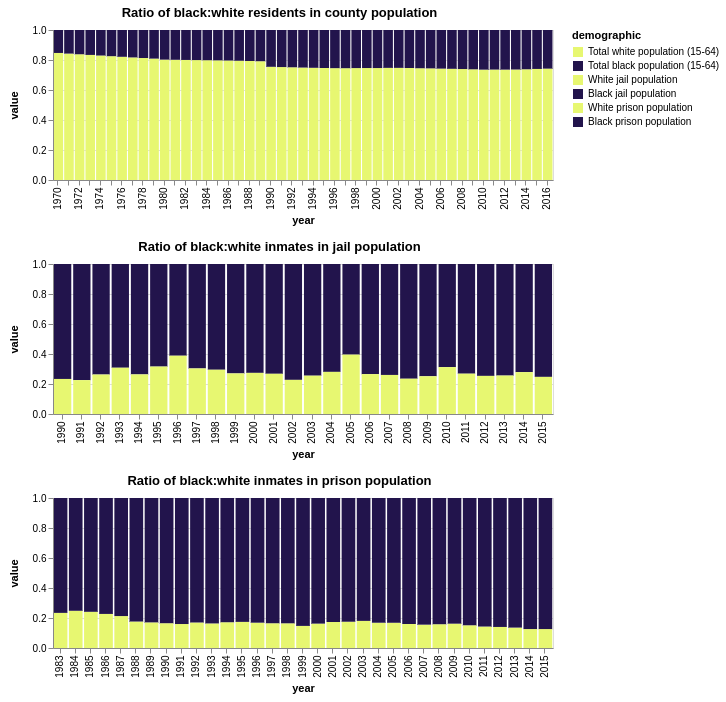

In [149]:
alt.vconcat(total_wb_population, total_wb_jail, total_wb_prison)